# Plot of $r^2K_e(r,t)$  

According Petri 2009 the expression of the number density of emitting particles in
the current sheet is given by **Eq. (8)**:

$$ K_e(r,t) = \frac{(N-N_0) \cdot sech^2(\Delta \cdot \psi ) + N_0}{r^2}$$ <br><br>
**Where**  $K_0 = \frac{N}{N_0}$ then $ N = K_0 \cdot N_0 $
<br><br>

\begin{align*}
K_e(r,t) &= \frac{(N-N_0) \cdot sech^2(\Delta \cdot \psi ) + N_0}{r^2} \\
&= \frac{(K_0 \cdot N_0 - N_0) \cdot sech^2(\Delta \cdot \psi ) + N_0}{r^2} \\
&= \frac{N_0(K_0 - 1) \cdot sech^2(\Delta \cdot \psi ) + N_0}{r^2} \\
&= N_0 \cdot \frac{(K_0 - 1) \cdot sech^2(\Delta \cdot \psi ) + 1}{r^2} \\
r^2 \cdot K_e(r,t) &=r^2 \cdot N_0 \cdot \frac{(K_0 - 1) \cdot sech^2(\Delta \cdot \psi ) + 1}{r^2} \\
&= N_0 \cdot [(K_0 - 1) \cdot sech^2(\Delta \cdot \psi ) + 1]
\end{align*}
<br><br>


The expression of $ \psi $ is given by the **Eq.(2) in Petri 2013**:
\begin{equation}
\psi = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \Omega \cdot (t -\frac{r}{\beta_v \cdot c}) )
\end{equation}

**Where** $\beta_v = \frac{v}{c}$ , $\Omega = \frac{c}{r_L} $ , $ t = 0$  and **suppose** $ z = \frac{r}{r_L}$

\begin{align*}
\psi &=  \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \frac{c}{r_L} \cdot (0 -\frac{r}{\frac{v}{c} \cdot c} ) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{c}{v} \cdot \frac{r}{r_L}) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\frac{v}{c}} \cdot z) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\beta_v} \cdot z) \\
\Rightarrow \psi = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{z}{\beta_v})
\end{align*}<br>
$ \Rightarrow r^2 \cdot K_e(r,t=0) = N_0 \cdot [(K_0 - 1) \cdot sech^2(\Delta \cdot \psi ) + 1] $


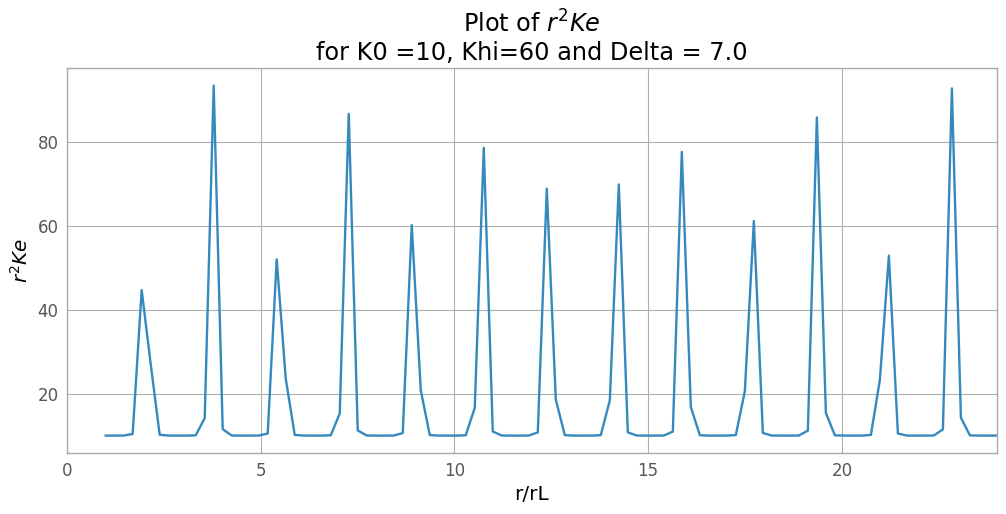

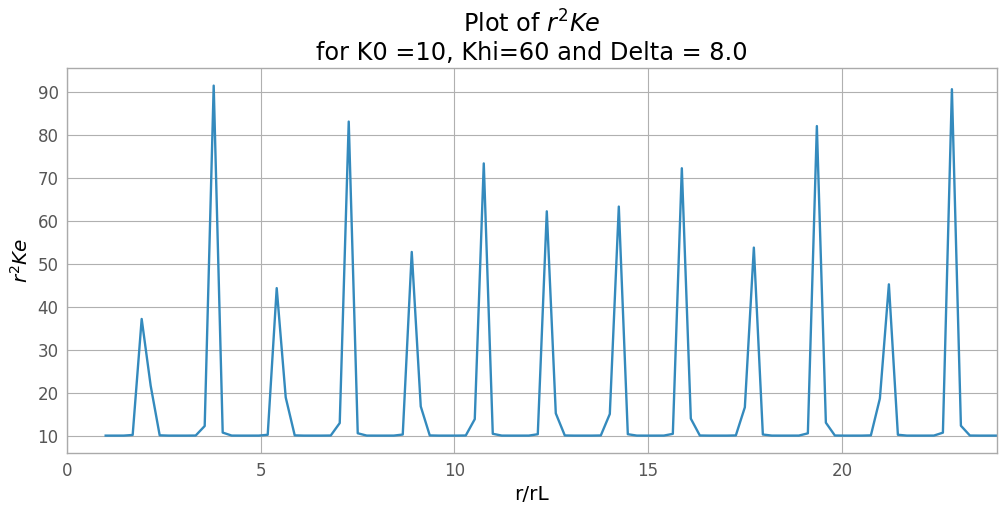

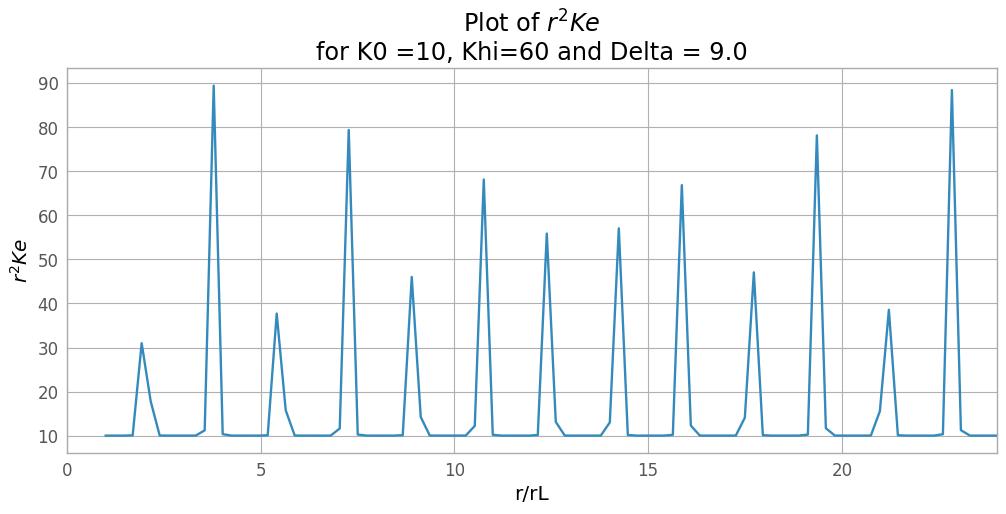

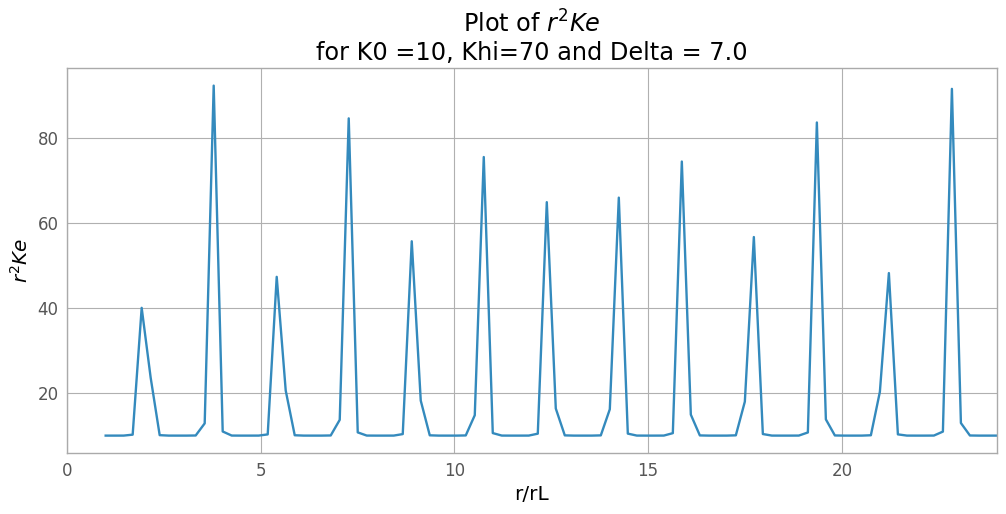

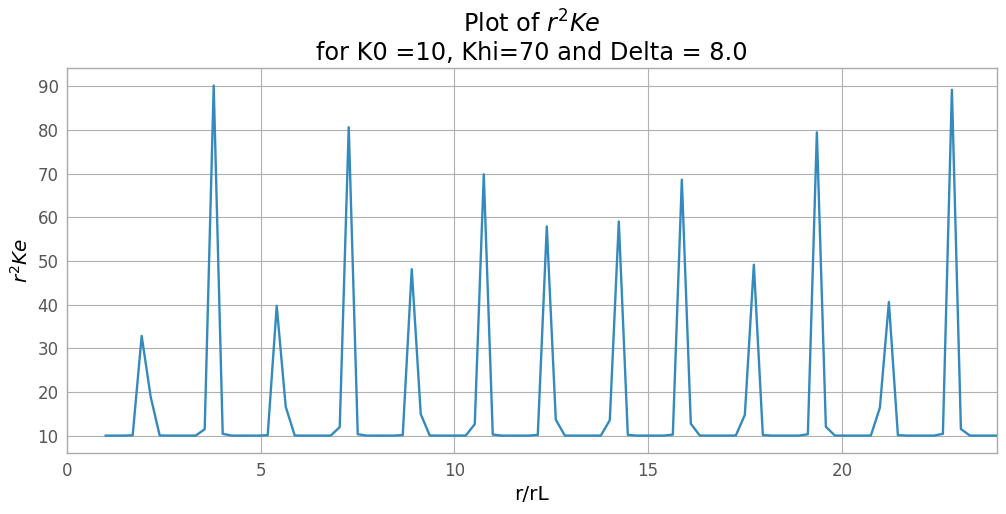

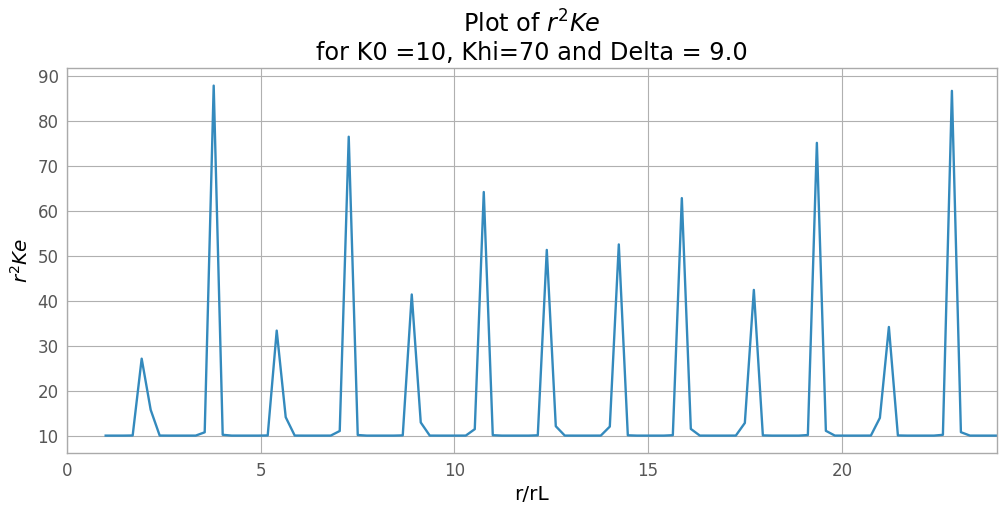

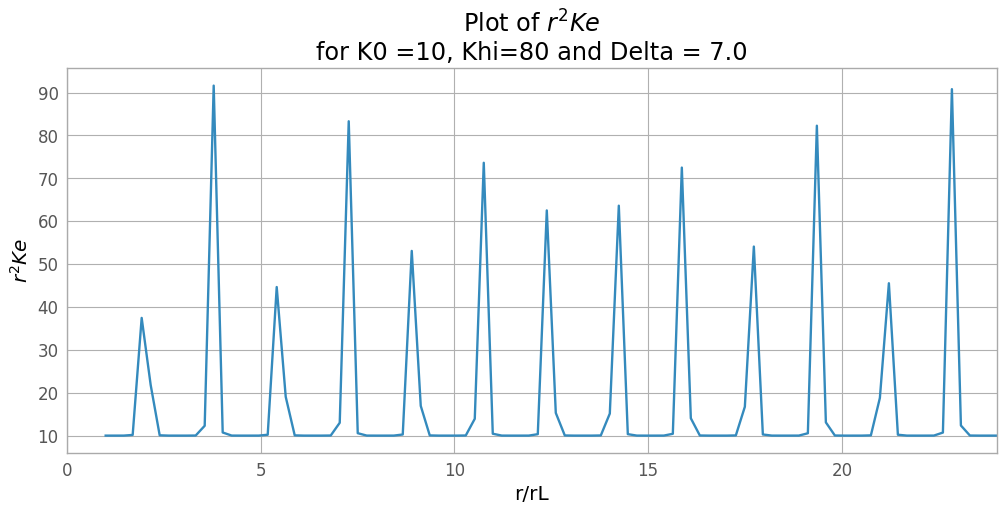

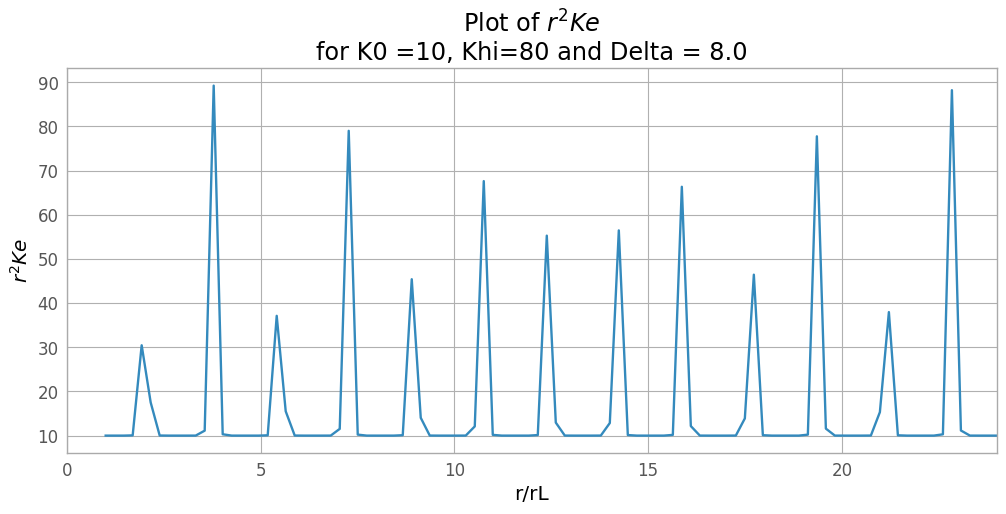

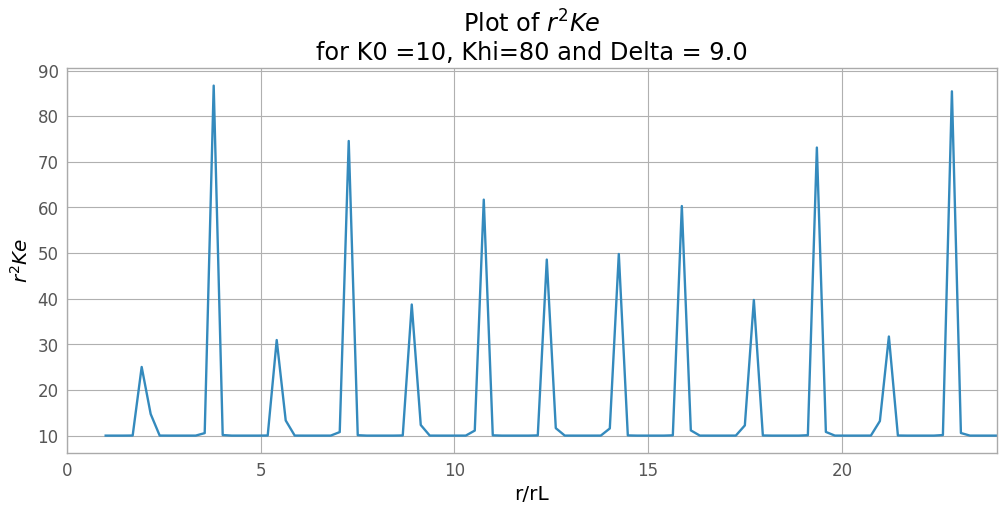

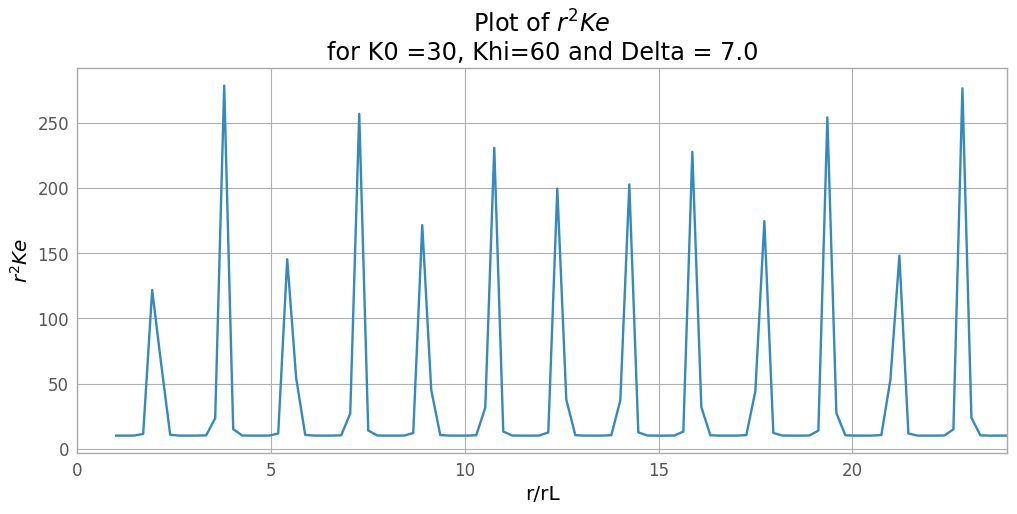

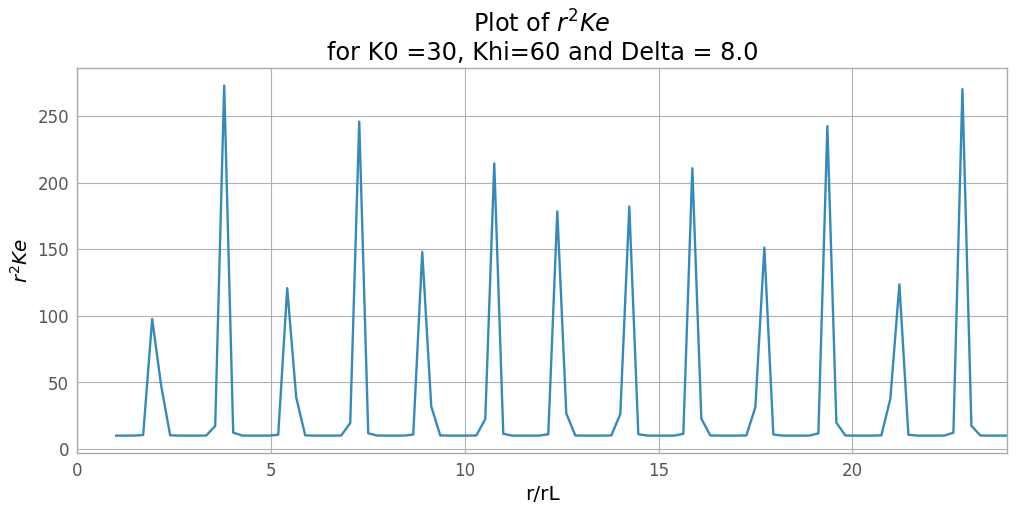

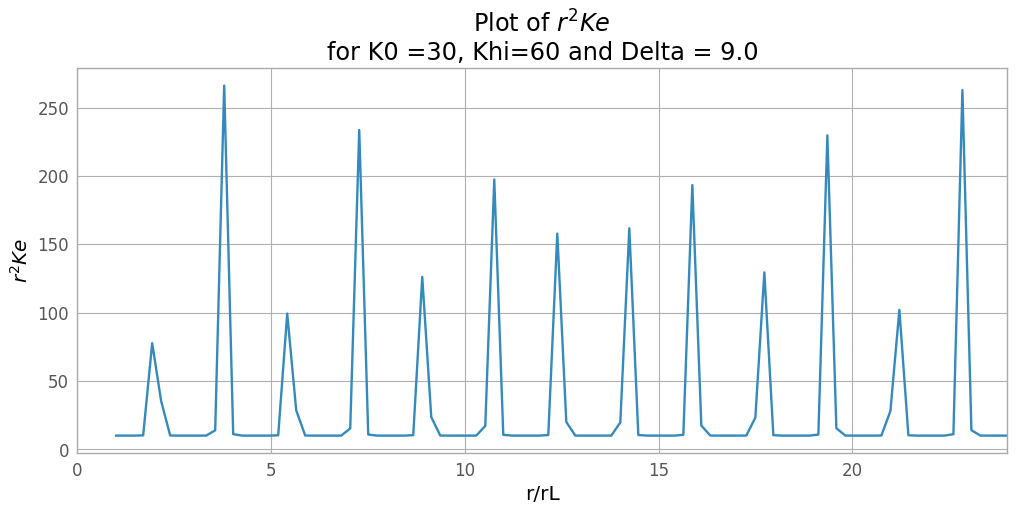

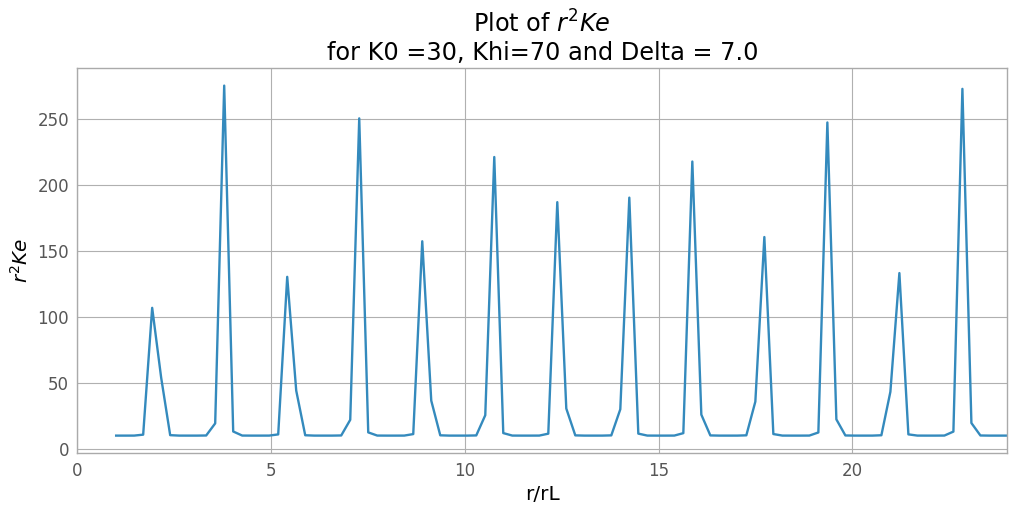

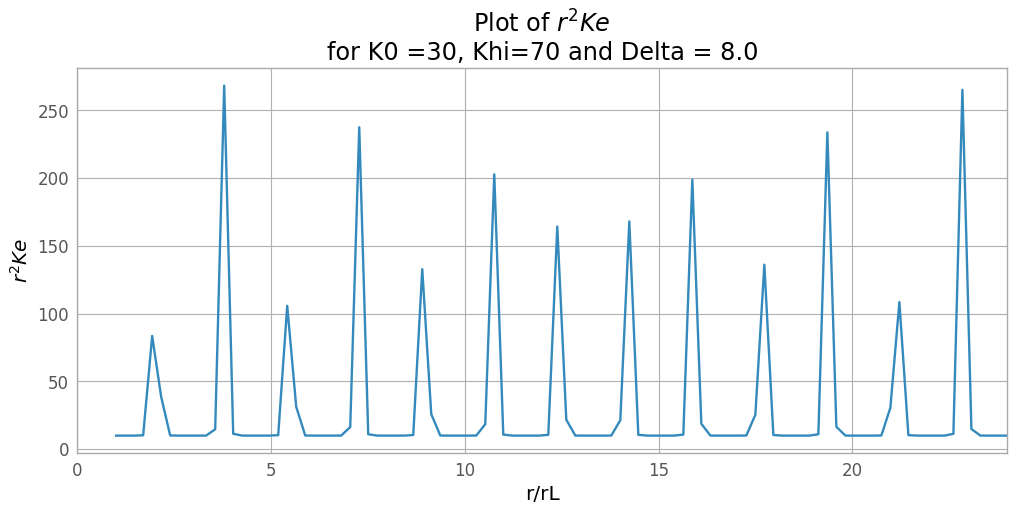

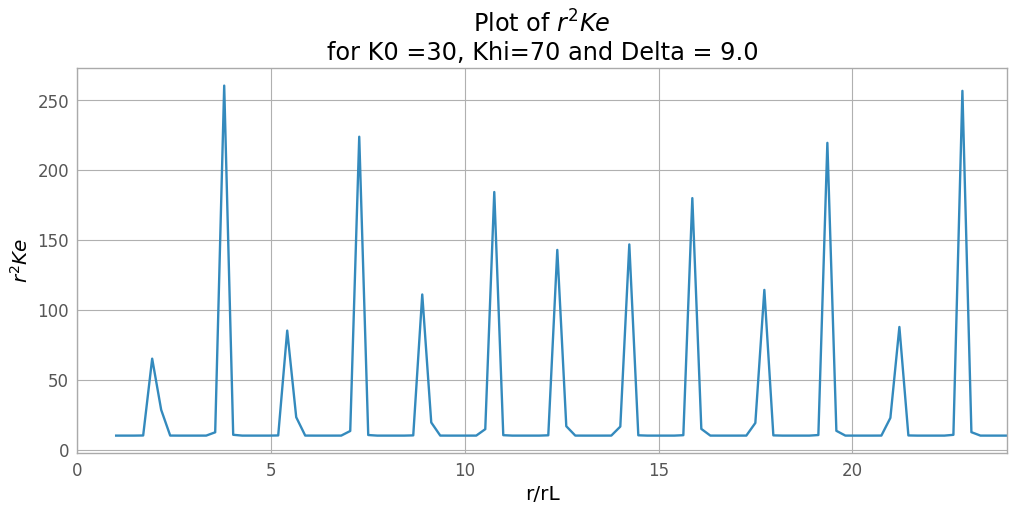

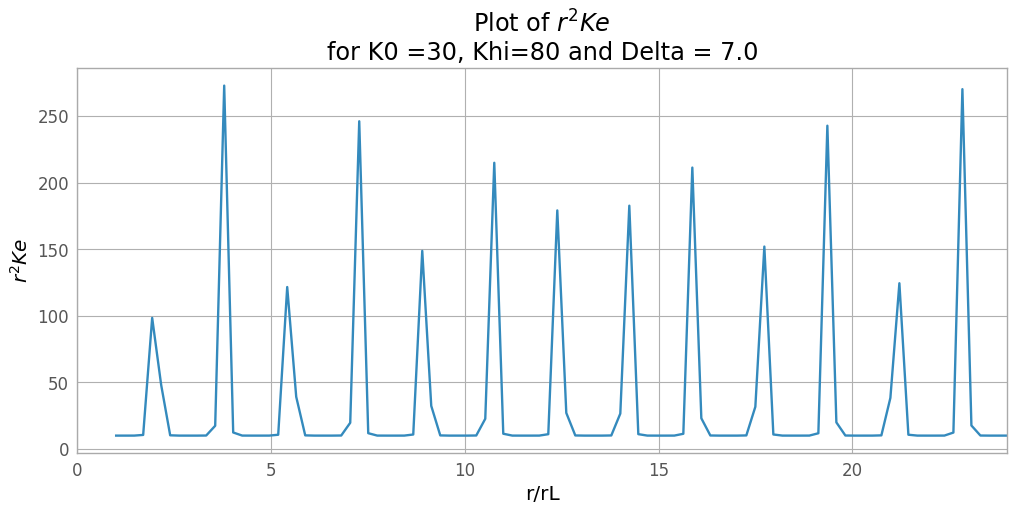

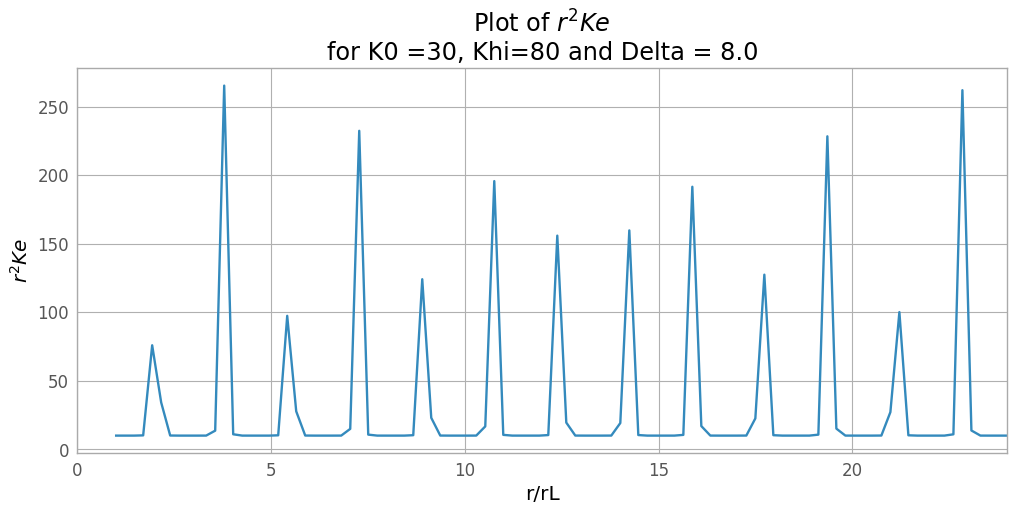

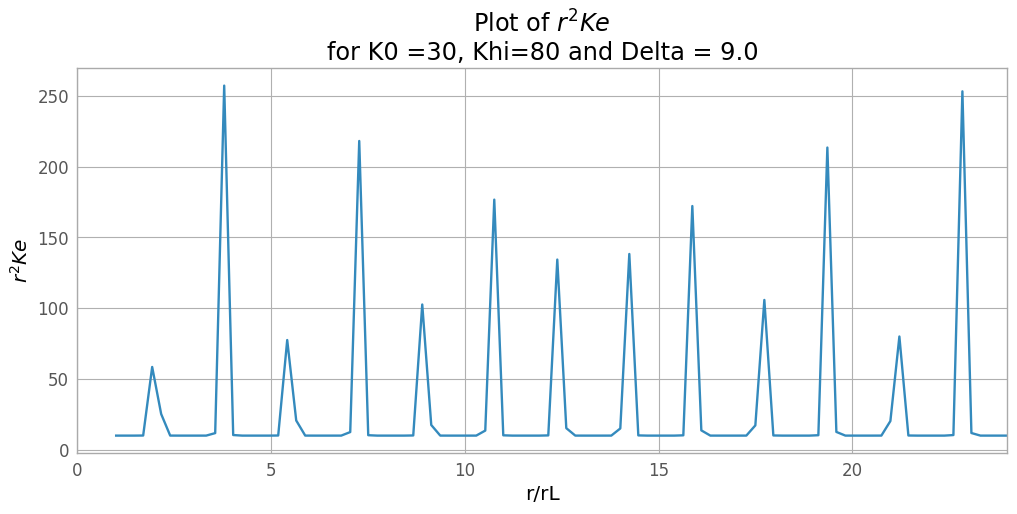

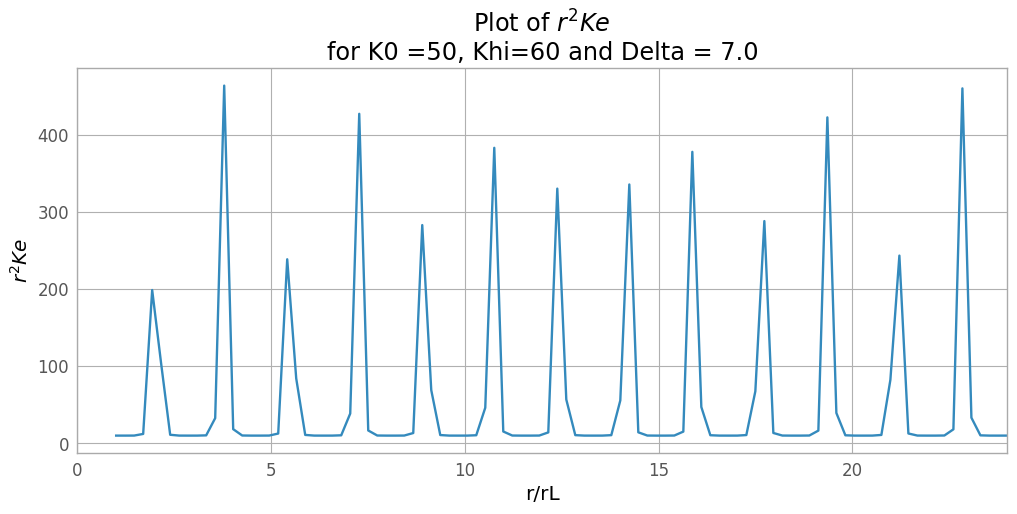

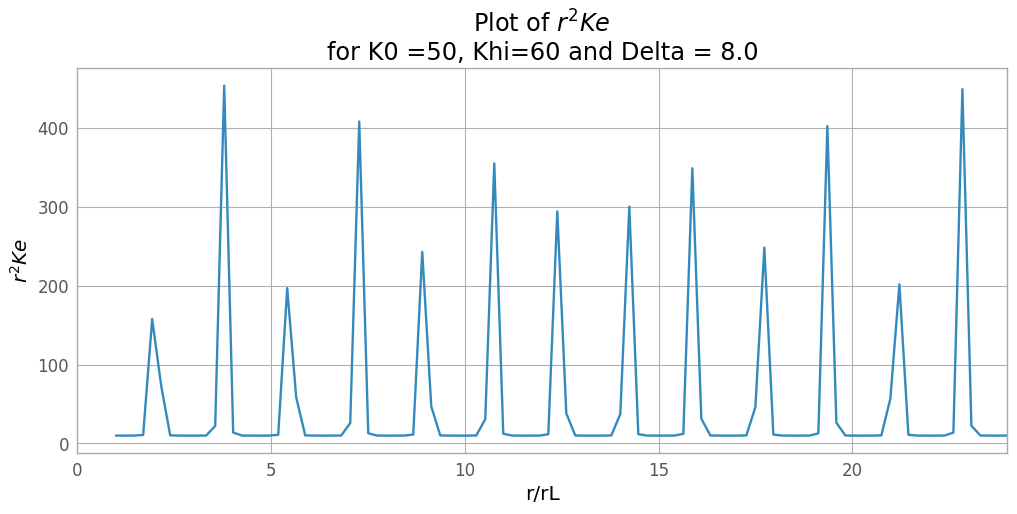

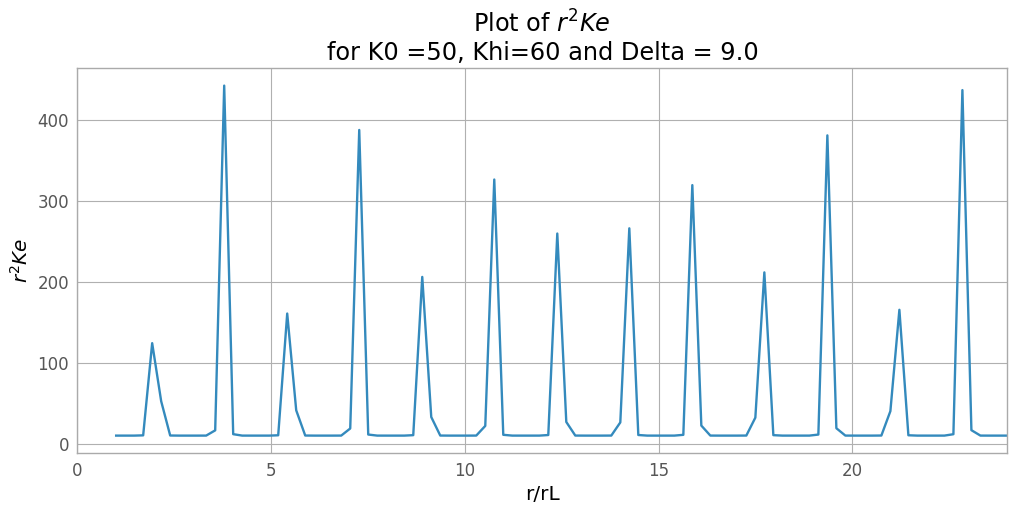

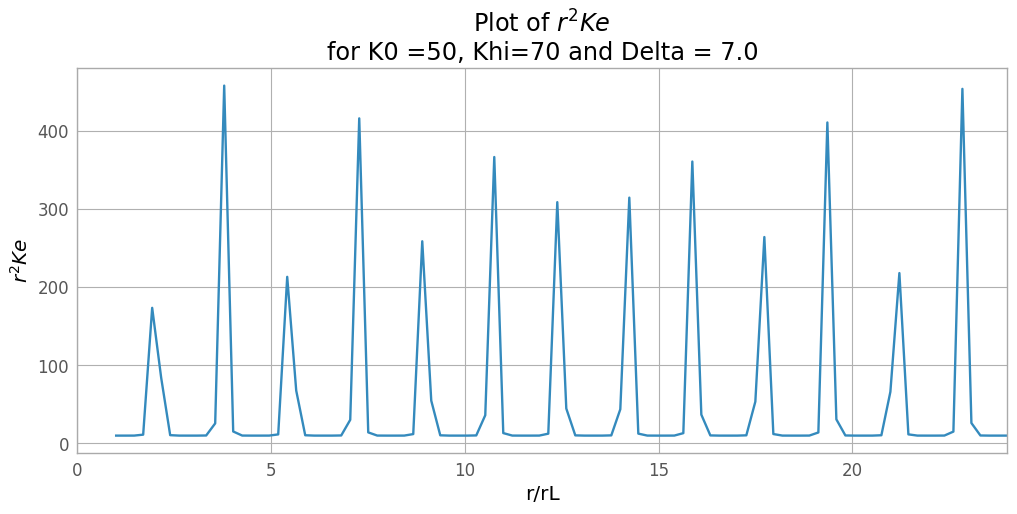

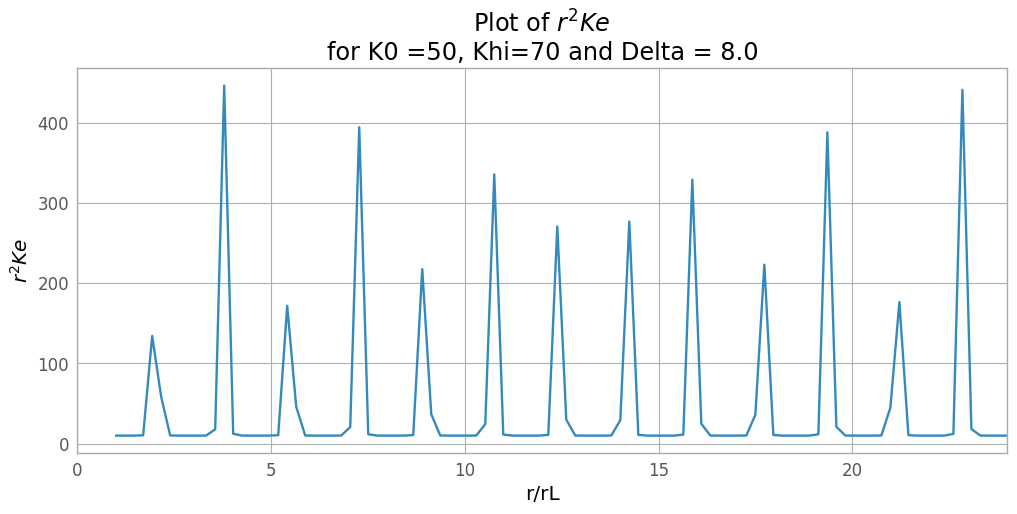

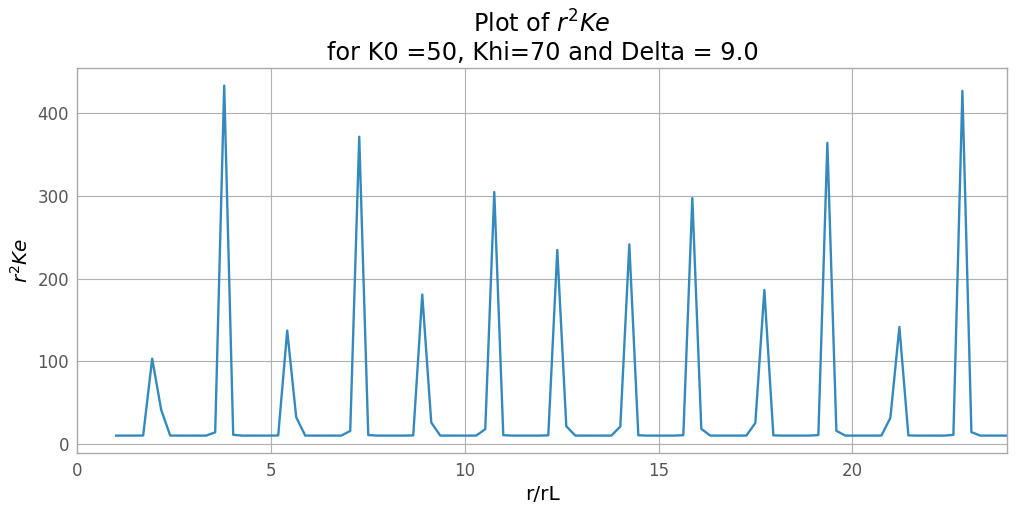

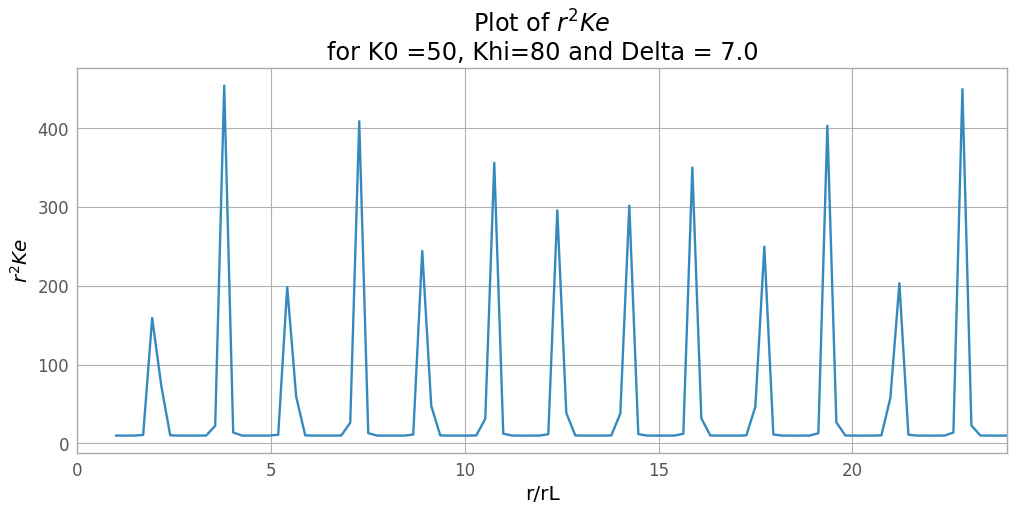

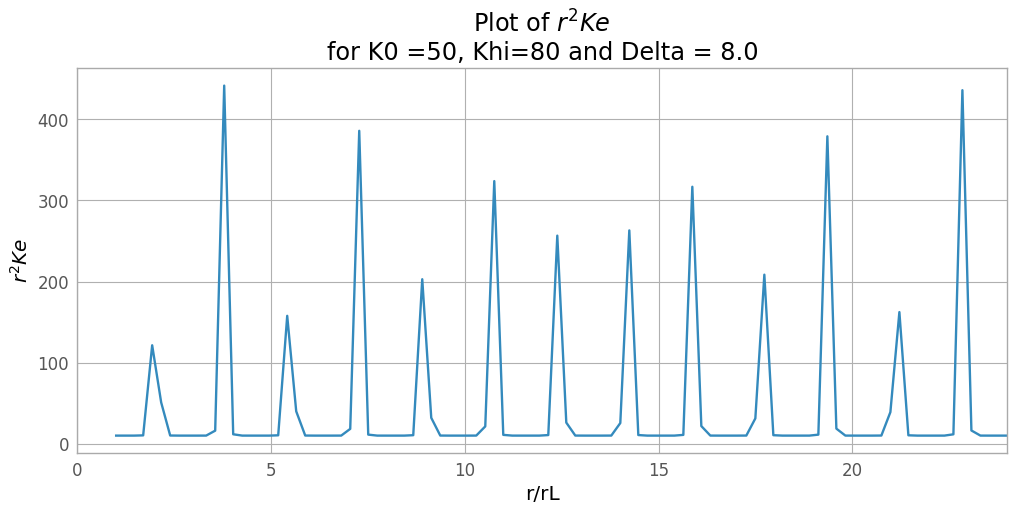

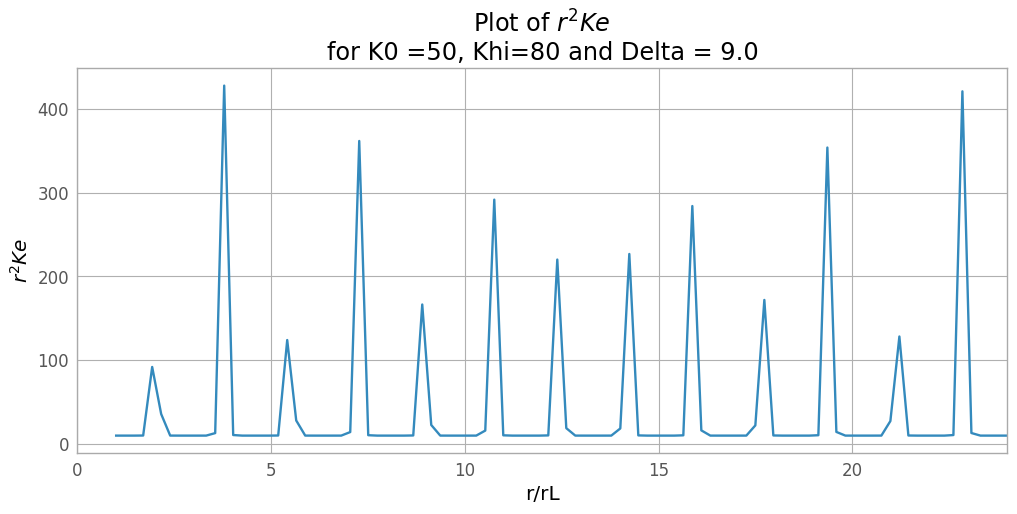

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
%matplotlib inline

def sech(x):
    return 1 / np.cosh(x)
    
def gauss_to_tesla(gauss):
    """
    Convert Gauss to Tesla.

    Parameters:
        gauss : Value in Gauss.

    Returns:
        Value converted to Tesla.
    """
    return gauss * 1e-4

def degrees_to_radians(degrees):
    """
    Convert degrees to radians.

    Parameters:
        degrees: Value in degrees.

    Returns:
        Value converted to radians.
    """
    return degrees * np.pi / 180

def plot_data(z, r2Ke, K0, Khi, Delta, title):
    """
    plot of $r^2$Ke for K0 and Delta giveen

    parameters:
        z: Array of z values,
        r2Ke: Array of $r^2$ * Ke values,
        K0: K0 value,
        Delta: Delta value,
        Khi: Value of Khi,
        title: Title for the plot
    """
    plt.figure(figsize=(12, 5))
    plt.plot(z, r2Ke)
    plt.title(title)
    plt.xlabel('r/rL')
    plt.ylabel('$r^2Ke$')
    plt.xlim(0, 24)
    plt.show()
    plt.close()

# Constants
f = 0.008538220
Omega = 2 * np.pi * f 
rL = 2.99792458e+08 / Omega
Bv = np.sqrt(1.2**2 - 1) / 1.2
BL_G = 0.3
BL_T = gauss_to_tesla(BL_G)
phi = np.pi / 3
theta = np.pi / 2
r = np.linspace(rL, 24*rL, 100)
z = r / rL
N0 = 10

# Varying parameters
K0v = np.arange(10, 51, 20) # vary K0v from 10 to 50 with step 20
Khi_values = np.arange(60, 81, 10)  # Vary Khi from 60 to 80 with step 10 degrees
Delta_values = np.linspace(7, 9, 3)  # Vary Delta from 7 to 9

for K0 in K0v:
    for Khi in Khi_values:
        Khi_r = degrees_to_radians(Khi)
        psi = np.cos(theta) * np.cos(Khi_r) + np.sin(theta) * np.sin(Khi_r) * np.cos(phi + z / Bv)
        
        for Delta in Delta_values:
            x = np.multiply(psi, Delta)
            sech_x = sech(x)
            sech2 = np.power(sech_x, 2)
            r2Ke = N0*((K0 - 1) * sech2 + 1)
            title = f"Plot of $r^2Ke$ \nfor K0 ={K0}, Khi={Khi} and Delta = {Delta}"
            plot_data(z, r2Ke, K0, Khi, Delta, title)